<a href="https://colab.research.google.com/github/aksharat/TensorFlow/blob/main/MilestoneProject3_BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-054214d0-0bda-1b63-4433-41bb8f149c43)


In [2]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2023-07-20 09:45:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2023-07-20 09:45:36 (19.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:

# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head(),df.info(),len(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(           Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
 Date                                                                       
 2013-10-01      BTC            123.65499       124.30466       124.75166   
 2013-10-02      BTC            125.45500       123.65499       125.75850   
 2013-10-03      BTC            108.58483       125.45500       125.66566   
 2013-10-04      BTC            118.67466       108.58483       118.67500   
 2013-10-05      BTC            121.33866       118.67466       121.93633   
 
             24h Low (USD)  
 Date                       
 2013-10-01      122.56349  
 2013-10-02      123.63383  
 2013-10-03       83.32833  
 2013-10-04      107.05816  
 2013-10-05      118.00566  ,
 None,
 2787)

In [4]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


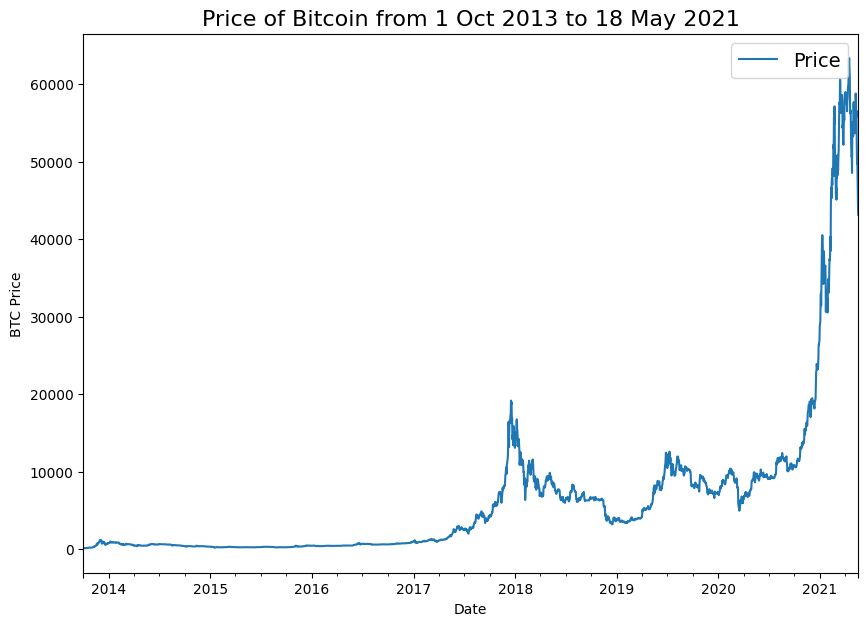

In [5]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [6]:

# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

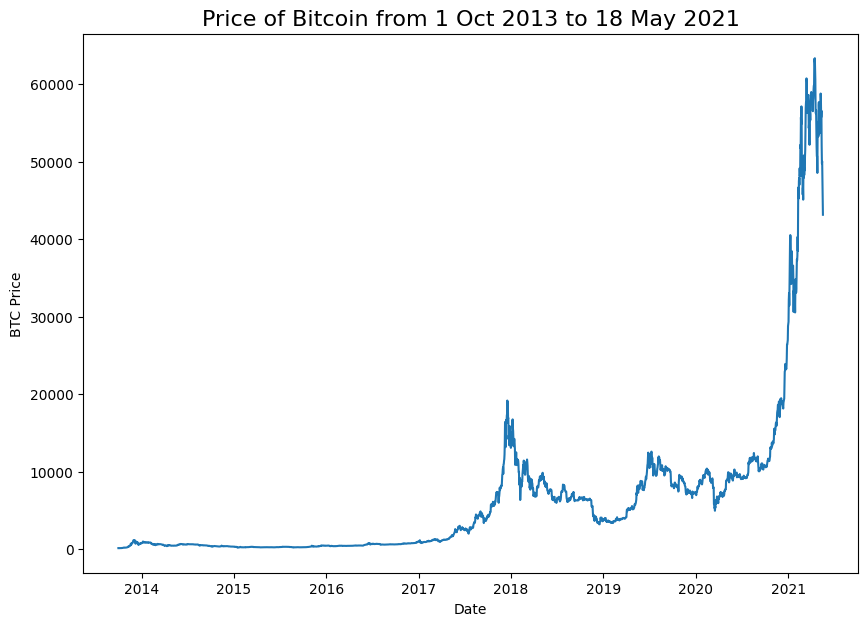

In [7]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");


In [8]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [9]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

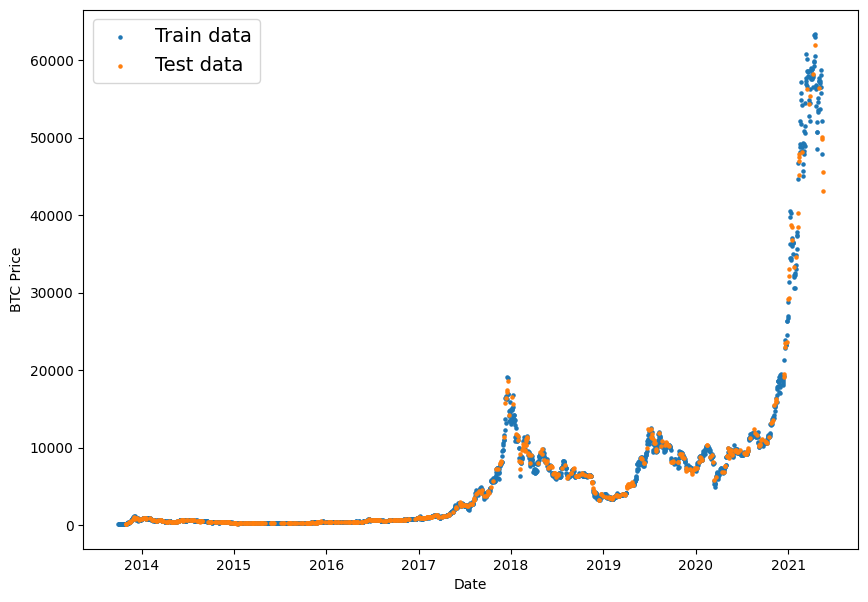

In [10]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [11]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2229, 558, 2229, 558)

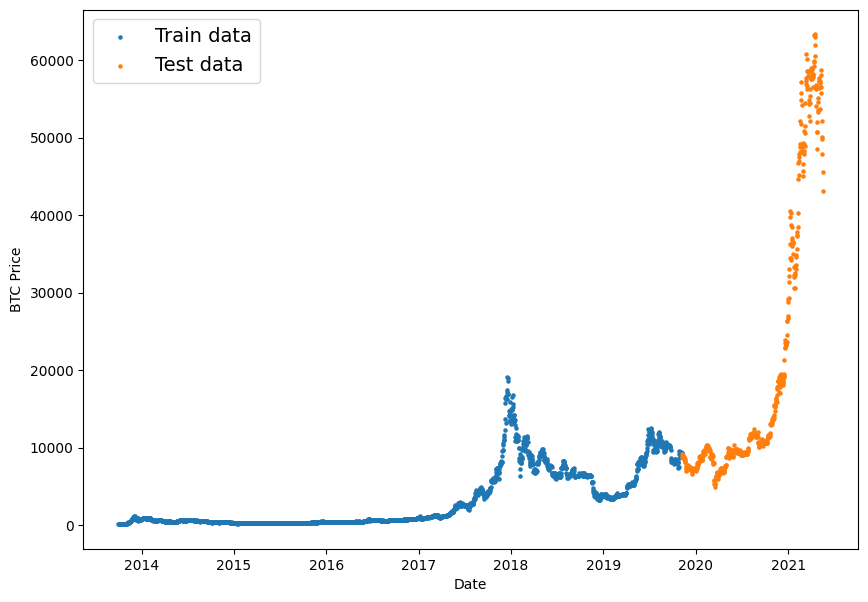

In [12]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


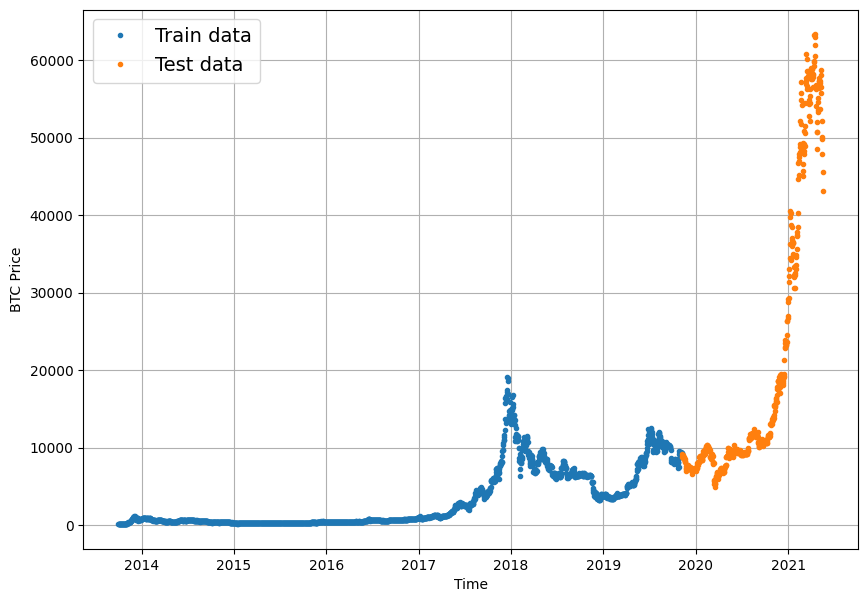

In [14]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Model 0

In [15]:

# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

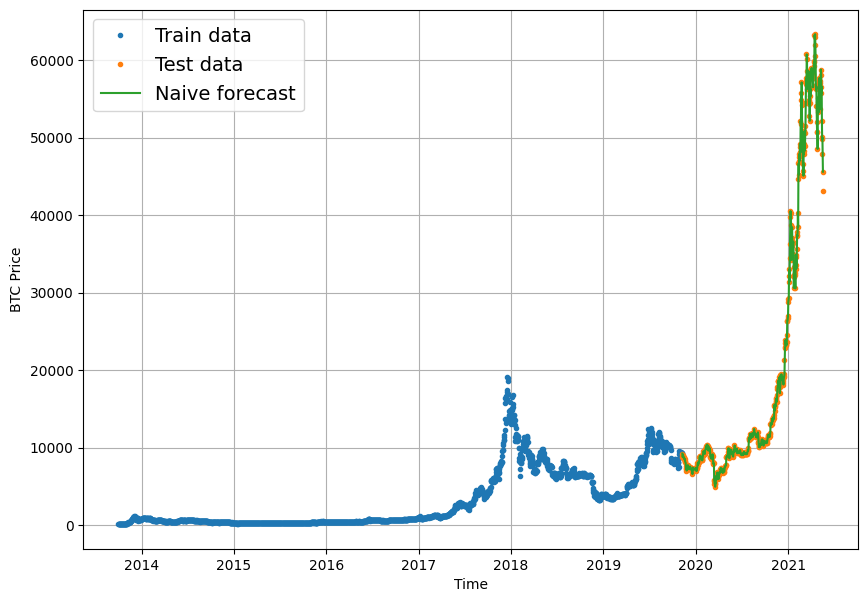

In [16]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

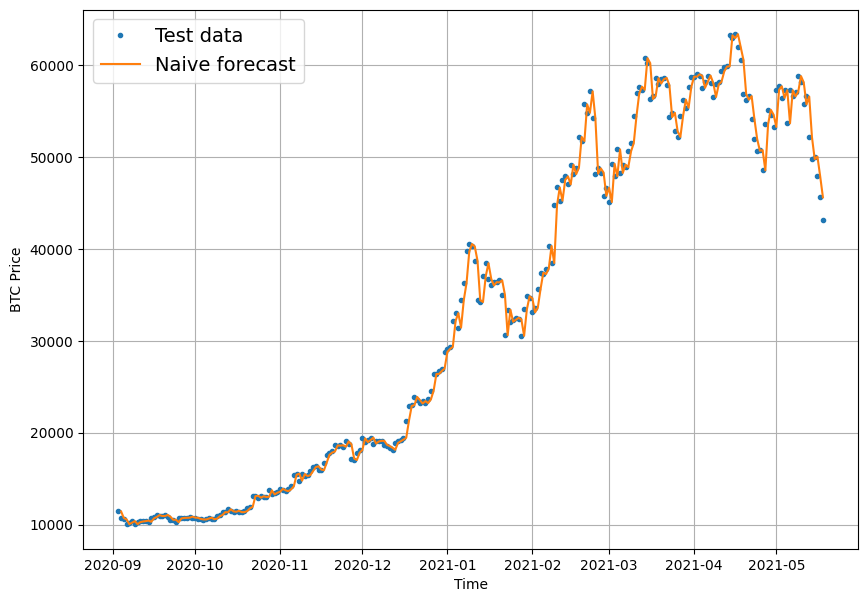

In [17]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


In [18]:
# Let's get TensorFlow!
import tensorflow as tf

In [19]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [20]:

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [22]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

In [23]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon


In [24]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows,labels


In [27]:

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [28]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [29]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [30]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [32]:

train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [33]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])


True

In [34]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


Model 1

In [35]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1984.6022 - mae: 1984.6022  

18/18 [==============================] - 10s 96ms/step - loss: 1469.2056 - mae: 1469.2056 - val_loss: 3028.4390 - val_mae: 3028.4390
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 380.6573 - mae: 380.6573

18/18 [==============================] - 1s 60ms/step - loss: 377.3707 - mae: 377.3707 - val_loss: 1589.5481 - val_mae: 1589.5481
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 215.5515 - mae: 215.5515

18/18 [==============================] - 1s 61ms/step - loss: 206.0643 - mae: 206.0643 - val_loss: 1206.2570 - val_mae: 1206.2570
Epoch 4/100
10/18 [===============>..............] - ETA: 0s - loss: 205.3217 - mae: 205.3217

18/18 [==============================] - 1s 74ms/step - loss: 186.6387 - mae: 186.6387 - val_loss: 1020.2773 - val_mae: 1020.2773
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 185.0859 - mae: 185.0859

18/18 [==============================] - 1s 45ms/step - loss: 179.6348 - mae: 179.6348 - val_loss: 986.8422 - val_mae: 986.8422
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 176.2024 - mae: 176.2024

18/18 [==============================] - 1s 46ms/step - loss: 177.1120 - mae: 177.1120 - val_loss: 965.6317 - val_mae: 965.6317
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 168.9658 - mae: 168.9658 - val_loss: 970.3233 - val_mae: 970.3233
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 161.9462 - mae: 161.9462

18/18 [==============================] - 1s 53ms/step - loss: 162.3147 - mae: 162.3147 - val_loss: 890.7404 - val_mae: 890.7404
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9221 - mae: 131.9221

18/18 [==============================] - 1s 29ms/step - loss: 160.8307 - mae: 160.8307 - val_loss: 877.3460 - val_mae: 877.3460
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 156.3114 - mae: 156.3114

18/18 [==============================] - 1s 30ms/step - loss: 156.3114 - mae: 156.3114 - val_loss: 849.2622 - val_mae: 849.2622
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 145.3534 - mae: 145.3534

18/18 [==============================] - 1s 29ms/step - loss: 145.3534 - mae: 145.3534 - val_loss: 823.6655 - val_mae: 823.6655
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 141.7148 - mae: 141.7148 - val_loss: 873.2160 - val_mae: 873.2160
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 142.2146 - mae: 142.2146 - val_loss: 841.1702 - val_mae: 841.1702
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 147.8127 - mae: 147.8127

18/18 [==============================] - 1s 30ms/step - loss: 133.8935 - mae: 133.8935 - val_loss: 781.5221 - val_mae: 781.5221
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 134.0770 - mae: 134.0770

18/18 [==============================] - 1s 30ms/step - loss: 134.0770 - mae: 134.0770 - val_loss: 731.3097 - val_mae: 731.3097
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 117.3430 - mae: 117.3430

18/18 [==============================] - 1s 30ms/step - loss: 128.5692 - mae: 128.5692 - val_loss: 715.2047 - val_mae: 715.2047
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 126.8736 - mae: 126.8736 - val_loss: 761.4655 - val_mae: 761.4655
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 125.9340 - mae: 125.9340

18/18 [==============================] - 0s 29ms/step - loss: 125.9340 - mae: 125.9340 - val_loss: 683.1298 - val_mae: 683.1298
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 124.2370 - mae: 124.2370 - val_loss: 715.3491 - val_mae: 715.3491
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2747 - mae: 132.2747

18/18 [==============================] - 1s 30ms/step - loss: 121.3892 - mae: 121.3892 - val_loss: 655.1450 - val_mae: 655.1450
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 126.3682 - mae: 126.3682 - val_loss: 659.4948 - val_mae: 659.4948
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3437 - mae: 120.3437 - val_loss: 697.3486 - val_mae: 697.3486
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 122.9316 - mae: 122.9316

18/18 [==============================] - 1s 31ms/step - loss: 122.2753 - mae: 122.2753 - val_loss: 633.3301 - val_mae: 633.3301
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 120.7118 - mae: 120.7118

18/18 [==============================] - 1s 30ms/step - loss: 119.4744 - mae: 119.4744 - val_loss: 627.7878 - val_mae: 627.7878
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 125.7636 - mae: 125.7636

18/18 [==============================] - 1s 29ms/step - loss: 117.5740 - mae: 117.5740 - val_loss: 625.3363 - val_mae: 625.3363
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 120.0236 - mae: 120.0236

18/18 [==============================] - 1s 30ms/step - loss: 116.4729 - mae: 116.4729 - val_loss: 623.8853 - val_mae: 623.8853
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 118.4883 - mae: 118.4883

18/18 [==============================] - 1s 30ms/step - loss: 118.4883 - mae: 118.4883 - val_loss: 612.5092 - val_mae: 612.5092
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9881 - mae: 114.9881 - val_loss: 616.8239 - val_mae: 616.8239
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 117.7819 - mae: 117.7819

18/18 [==============================] - 0s 28ms/step - loss: 115.6254 - mae: 115.6254 - val_loss: 611.1840 - val_mae: 611.1840
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 117.8699 - mae: 117.8699 - val_loss: 613.0994 - val_mae: 613.0994
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3580 - mae: 113.3580 - val_loss: 617.1341 - val_mae: 617.1341
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7637 - mae: 112.7637 - val_loss: 614.7013 - val_mae: 614.7013
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 145.9171 - mae: 145.9171

18/18 [==============================] - 1s 44ms/step - loss: 112.0463 - mae: 112.0463 - val_loss: 598.4779 - val_mae: 598.4779
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 131.6057 - mae: 131.6057

18/18 [==============================] - 1s 30ms/step - loss: 111.9267 - mae: 111.9267 - val_loss: 591.4980 - val_mae: 591.4980
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3951 - mae: 111.3951 - val_loss: 594.7545 - val_mae: 594.7545
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 114.0519 - mae: 114.0519

18/18 [==============================] - 1s 45ms/step - loss: 117.1622 - mae: 117.1622 - val_loss: 587.9215 - val_mae: 587.9215
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8956 - mae: 110.8956 - val_loss: 604.0491 - val_mae: 604.0491
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3522 - mae: 112.3522 - val_loss: 592.1488 - val_mae: 592.1488
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 113.9112 - mae: 113.9112

18/18 [==============================] - 1s 43ms/step - loss: 111.1095 - mae: 111.1095 - val_loss: 582.3107 - val_mae: 582.3107
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 109.5683 - mae: 109.5683 - val_loss: 589.1807 - val_mae: 589.1807
Epoch 41/100
13/18 [====================>.........] - ETA: 0s - loss: 112.7353 - mae: 112.7353

18/18 [==============================] - 1s 37ms/step - loss: 109.5216 - mae: 109.5216 - val_loss: 580.9713 - val_mae: 580.9713
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 117.4287 - mae: 117.4287 - val_loss: 607.4381 - val_mae: 607.4381
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5518 - mae: 114.5518 - val_loss: 664.7197 - val_mae: 664.7197
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7954 - mae: 112.7954 - val_loss: 596.0228 - val_mae: 596.0228
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2299 - mae: 110.2299 - val_loss: 603.6752 - val_mae: 603.6752
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7589 - mae: 109.7589 - val_loss: 609.7330 - val_mae: 609.7330
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7664 - mae: 109.7664 - val_loss: 594.4261 - val_mae: 594.4261
Epoch 48/100
18/18 [============

18/18 [==============================] - 1s 29ms/step - loss: 109.9796 - mae: 109.9796 - val_loss: 567.8766 - val_mae: 567.8766
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8362 - mae: 109.8362 - val_loss: 571.5506 - val_mae: 571.5506
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3480 - mae: 107.3480 - val_loss: 769.1516 - val_mae: 769.1516
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 124.5909 - mae: 124.5909 - val_loss: 639.7546 - val_mae: 639.7546
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7882 - mae: 117.7882 - val_loss: 600.4429 - val_mae: 600.4429
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2283 - mae: 110.2283 - val_loss: 649.9803 - val_mae: 649.9803
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3630 - mae: 113.3630 - val_loss: 680.8240 - val_mae: 680.8240
Epoch 61/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 110.9384 - mae: 110.9384 - val_loss: 566.8388 - val_mae: 566.8388
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2726 - mae: 106.2726 - val_loss: 583.1146 - val_mae: 583.1146
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5471 - mae: 107.5471 - val_loss: 576.2351 - val_mae: 576.2351
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7684 - mae: 106.7684 - val_loss: 605.8237 - val_mae: 605.8237
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 135.7349 - mae: 135.7349

18/18 [==============================] - 1s 29ms/step - loss: 109.1926 - mae: 109.1926 - val_loss: 565.1185 - val_mae: 565.1185
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8904 - mae: 105.8904 - val_loss: 567.1149 - val_mae: 567.1149
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0456 - mae: 107.0456 - val_loss: 689.8438 - val_mae: 689.8438
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5460 - mae: 109.5460 - val_loss: 568.5280 - val_mae: 568.5280
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1410 - mae: 115.1410 - val_loss: 710.6488 - val_mae: 710.6488
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 121.5264 - mae: 121.5264 - val_loss: 595.7583 - val_mae: 595.7583
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2258 - mae: 113.2258 - val_loss: 567.1475 - val_mae: 567.1475
Epoch 72/100
 1/18 [>...........

18/18 [==============================] - 1s 29ms/step - loss: 108.5067 - mae: 108.5067 - val_loss: 563.8843 - val_mae: 563.8843
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7152 - mae: 106.7152 - val_loss: 569.0253 - val_mae: 569.0253
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0834 - mae: 109.0834 - val_loss: 581.8882 - val_mae: 581.8882
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2428 - mae: 111.2428 - val_loss: 669.5328 - val_mae: 669.5328
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9029 - mae: 114.9029 - val_loss: 628.7869 - val_mae: 628.7869
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 106.5608 - mae: 106.5608 - val_loss: 569.8784 - val_mae: 569.8784
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8856 - mae: 108.8856 - val_loss: 591.9419 - val_mae: 591.9419
Epoch 79/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 105.4265 - mae: 105.4265 - val_loss: 563.5637 - val_mae: 563.5637
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3461 - mae: 115.3461 - val_loss: 578.7737 - val_mae: 578.7737
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8314 - mae: 115.8314 - val_loss: 656.5486 - val_mae: 656.5486
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4798 - mae: 113.4798 - val_loss: 582.3405 - val_mae: 582.3405
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0097 - mae: 107.0097 - val_loss: 566.6146 - val_mae: 566.6146
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7839 - mae: 107.7839 - val_loss: 572.3904 - val_mae: 572.3904
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.7023 - mae: 105.7023 - val_loss: 576.2361 - val_mae: 576.2361
Epoch 88/100
18/18 [============

In [36]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 644.8261 - mae: 644.8261


[644.8261108398438, 644.8261108398438]

In [37]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 563.5636 - mae: 563.5636


[563.5635986328125, 563.5635986328125]

In [38]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [39]:

# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8833.445 , 8763.56  , 9008.961 , 8759.901 , 8749.339 , 8712.297 ,
        8671.391 , 8508.828 , 8447.041 , 8512.8955], dtype=float32)>)

In [40]:

# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 563.5636,
 'mse': 1149955.4,
 'rmse': 1072.3597,
 'mape': 2.5298905,
 'mase': 0.99002516}

In [41]:

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

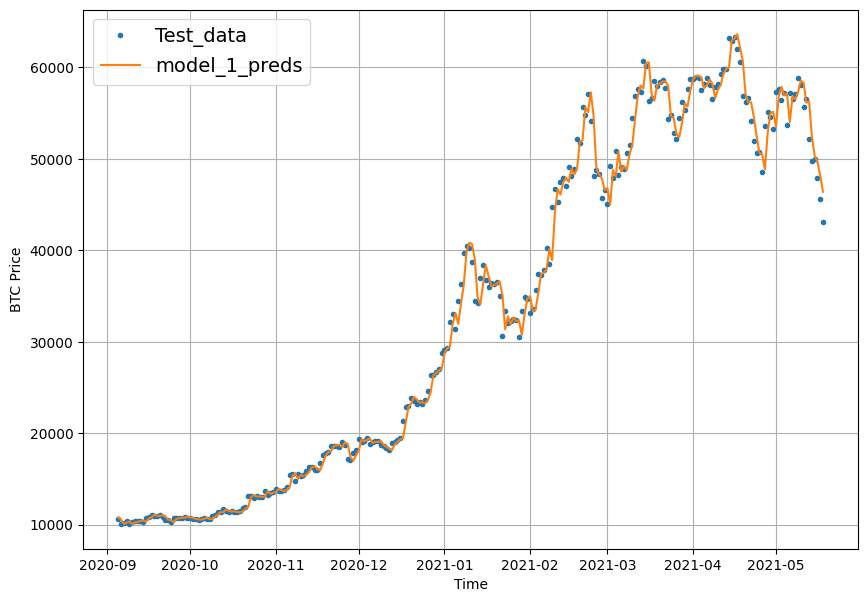

In [42]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


Model 2

In [43]:

HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [44]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [47]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 606.1357


606.1356811523438

In [48]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 606.1357


606.1356811523438

In [49]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 606.1357,
 'mse': 1251386.9,
 'rmse': 1118.654,
 'mape': 2.7288737,
 'mase': 1.0595311}

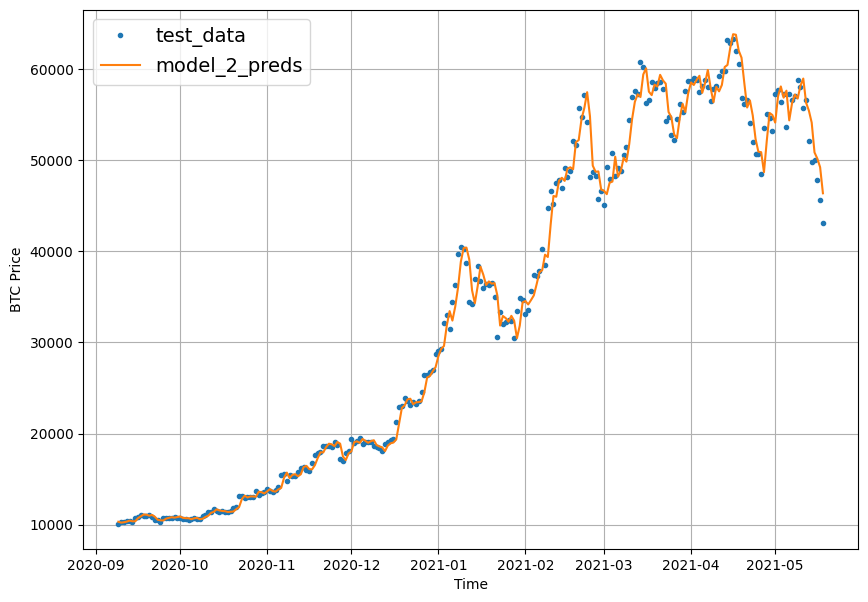

In [51]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


Model 3

In [52]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [54]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [55]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 4ms/step - loss: 1440.2850


1440.2850341796875

In [56]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1247.0985


1247.0985107421875

In [57]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9665.851, 9265.882, 9320.448, 9695.833, 9466.445, 9351.591,
        9762.462],
       [9298.212, 8932.588, 8961.234, 9264.596, 9234.64 , 9034.046,
        9343.622],
       [8920.469, 8763.208, 8850.389, 9136.363, 9217.225, 9054.679,
        9085.773],
       [8938.288, 8945.151, 9068.118, 9221.074, 9193.268, 9347.358,
        9111.295],
       [8735.019, 8749.107, 8925.906, 9048.975, 8928.781, 9156.409,
        8808.871]], dtype=float32)>

In [58]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  710.8581  ,   443.9064  ,   345.64746 ,   491.19867 ,
          360.744   ,   304.3886  ,   501.98074 ,   608.28033 ,
          569.2441  ,   447.7059  ,   673.06165 ,   728.1029  ,
          726.55896 ,   814.3875  ,   617.174   ,   227.16824 ,
          211.73055 ,   216.30496 ,   243.16197 ,   316.24316 ,
          128.12346 ,   170.99142 ,   284.62277 ,   359.97162 ,
          153.40123 ,   143.26277 ,   124.83907 ,   137.46205 ,
          148.66252 ,   184.68102 ,   253.01283 ,   369.2733  ,
          328.2719  ,   394.0403  ,   287.3528  ,   276.6548  ,
          336.9433  ,   208.61705 ,   227.88484 ,   233.46352 ,
          474.38812 ,    99.20494 ,   108.96387 ,   139.53201 ,
           75.      ,    64.56989 ,   148.42885 ,   130.7544  ,
          109.15199 ,   130.9098  ,   122.160576,   133.83098 ,
          187.6965  ,   164.84695 ,   224.56215 ,   341.44867 ,
          496.30496 ,   514.99115 ,   500.93262 ,   619.38226 ,
          357.37668 ,   201.53816

In [59]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [60]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1247.0985,
 'mse': 5430632.0,
 'rmse': 1428.6002,
 'mape': 5.555855,
 'mase': 2.219142}

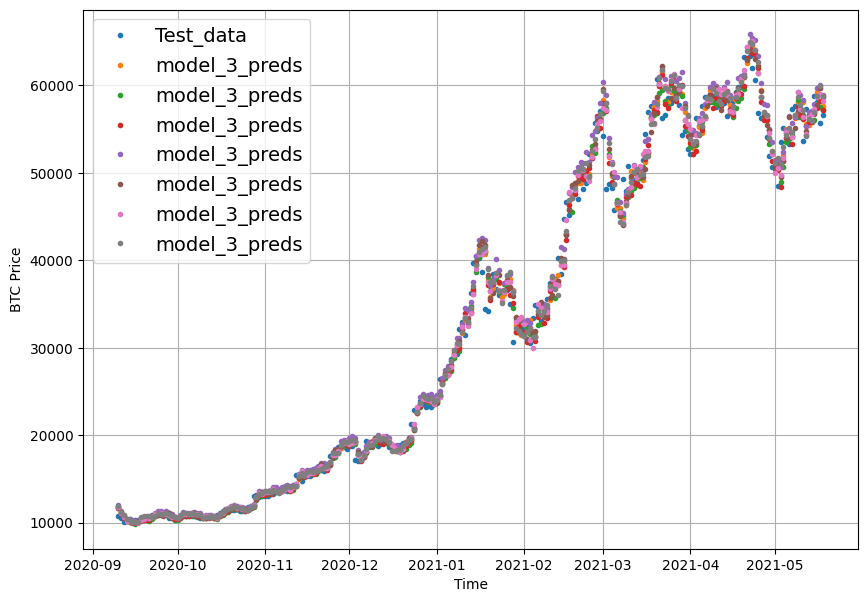

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


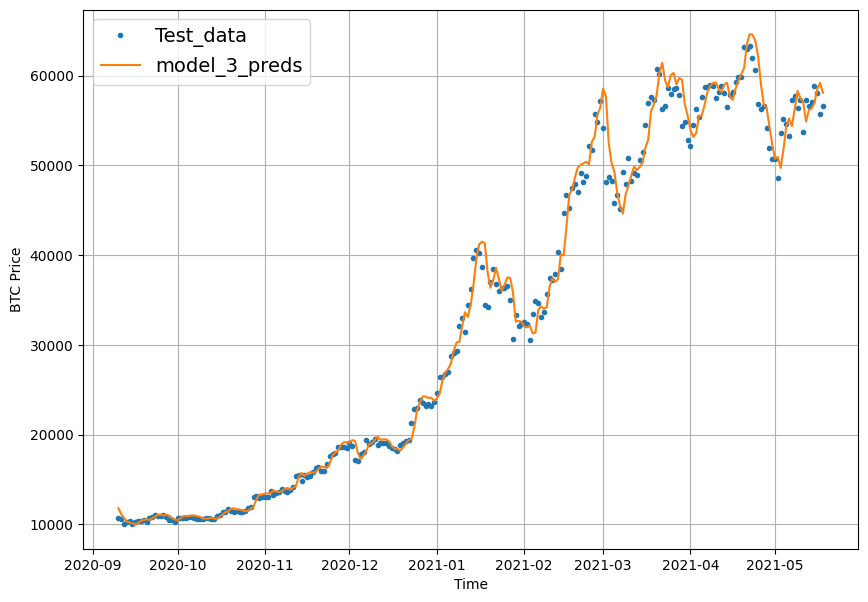

In [62]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

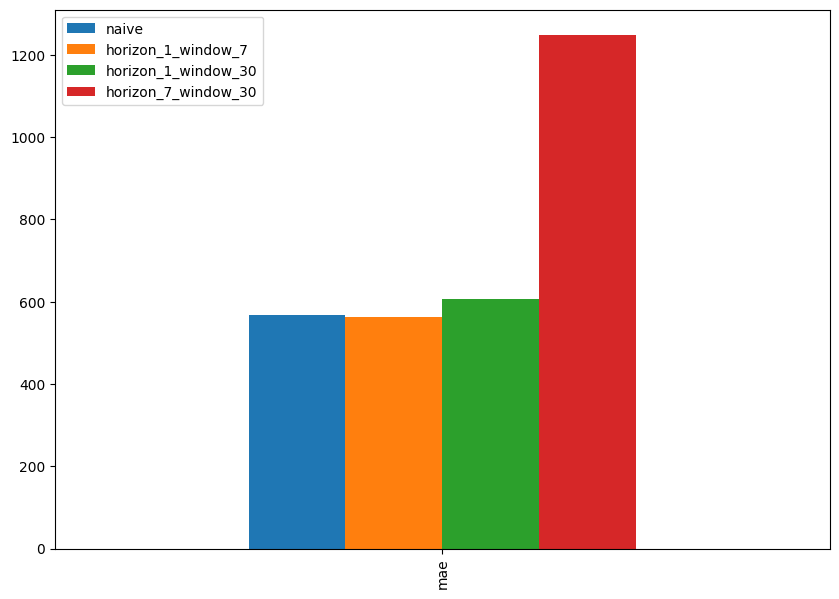

In [63]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


Model 4

In [64]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [65]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [66]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [67]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [68]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [69]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 575.7555


575.7554931640625

In [71]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8892.304, 8789.238, 8977.632, 8784.593, 8738.011, 8715.935,
       8667.634, 8529.062, 8453.998, 8500.161], dtype=float32)>

In [72]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 575.7555,
 'mse': 1195582.5,
 'rmse': 1093.427,
 'mape': 2.5749865,
 'mase': 1.0114429}

Model 5

In [73]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


In [74]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 593.4292


593.42919921875

In [75]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8969.358, 8821.865, 8961.193, 8817.035, 8766.152, 8748.418,
       8701.061, 8573.349, 8481.056, 8517.67 ], dtype=float32)>

In [76]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results


{'mae': 593.4292,
 'mse': 1262200.0,
 'rmse': 1123.4767,
 'mape': 2.6719034,
 'mase': 1.0424907}

Model 6

In [77]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [78]:

# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [79]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


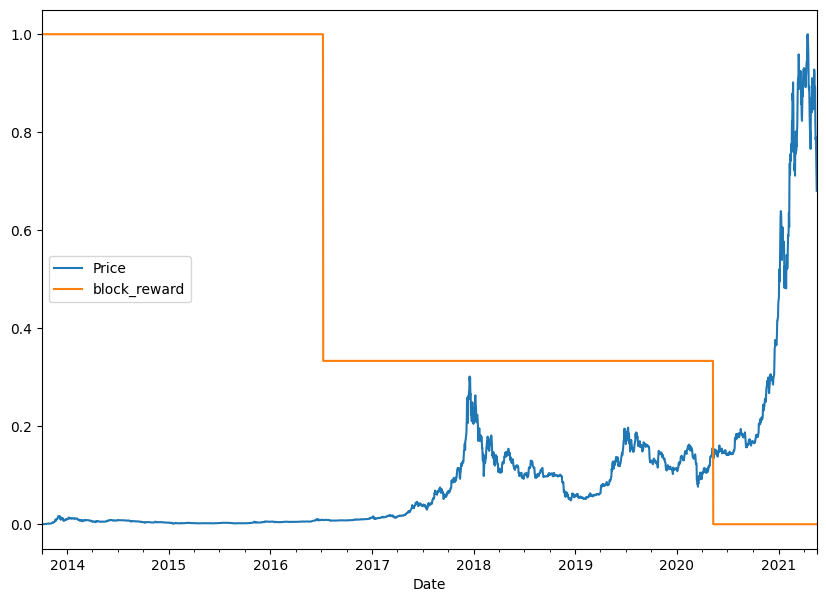

In [80]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [81]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [82]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [83]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(),y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [84]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [85]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [86]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.8229


566.8229370117188

In [87]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.118 , 8775.01  , 9018.552 , 8754.649 , 8738.246 , 8724.55  ,
       8690.521 , 8500.065 , 8459.0205, 8520.771 ], dtype=float32)>

In [88]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 566.82294,
 'mse': 1162655.1,
 'rmse': 1078.2649,
 'mape': 2.5528202,
 'mase': 0.9957509}

In [89]:
model_1_results

{'mae': 563.5636,
 'mse': 1149955.4,
 'rmse': 1072.3597,
 'mape': 2.5298905,
 'mase': 0.99002516}

Model 7

In [90]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [91]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [92]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [93]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.86684847  0.5253632  -0.04042263  0.21803036 -0.8529831   0.25771442
  0.29183352]
Forecast: 0.9223744869232178


In [94]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [95]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [96]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [97]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [98]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [99]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [100]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [101]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])
# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])




Epoch 179: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 288: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 388: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2min 5s, sys: 2.44 s, total: 2min 7s
Wall time: 2min 19s


In [102]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 580.7674 - mae: 580.7674 - mse: 1156156.1250


[580.7673950195312, 580.7673950195312, 1156156.125]

In [103]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8902.077, 8809.51 , 8996.12 , 8794.582, 8742.381, 8760.906,
       8652.447, 8499.835, 8491.155, 8490.347], dtype=float32)>

In [104]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results


{'mae': 580.7674,
 'mse': 1156156.1,
 'rmse': 1075.247,
 'mape': 2.665417,
 'mase': 1.0202475}

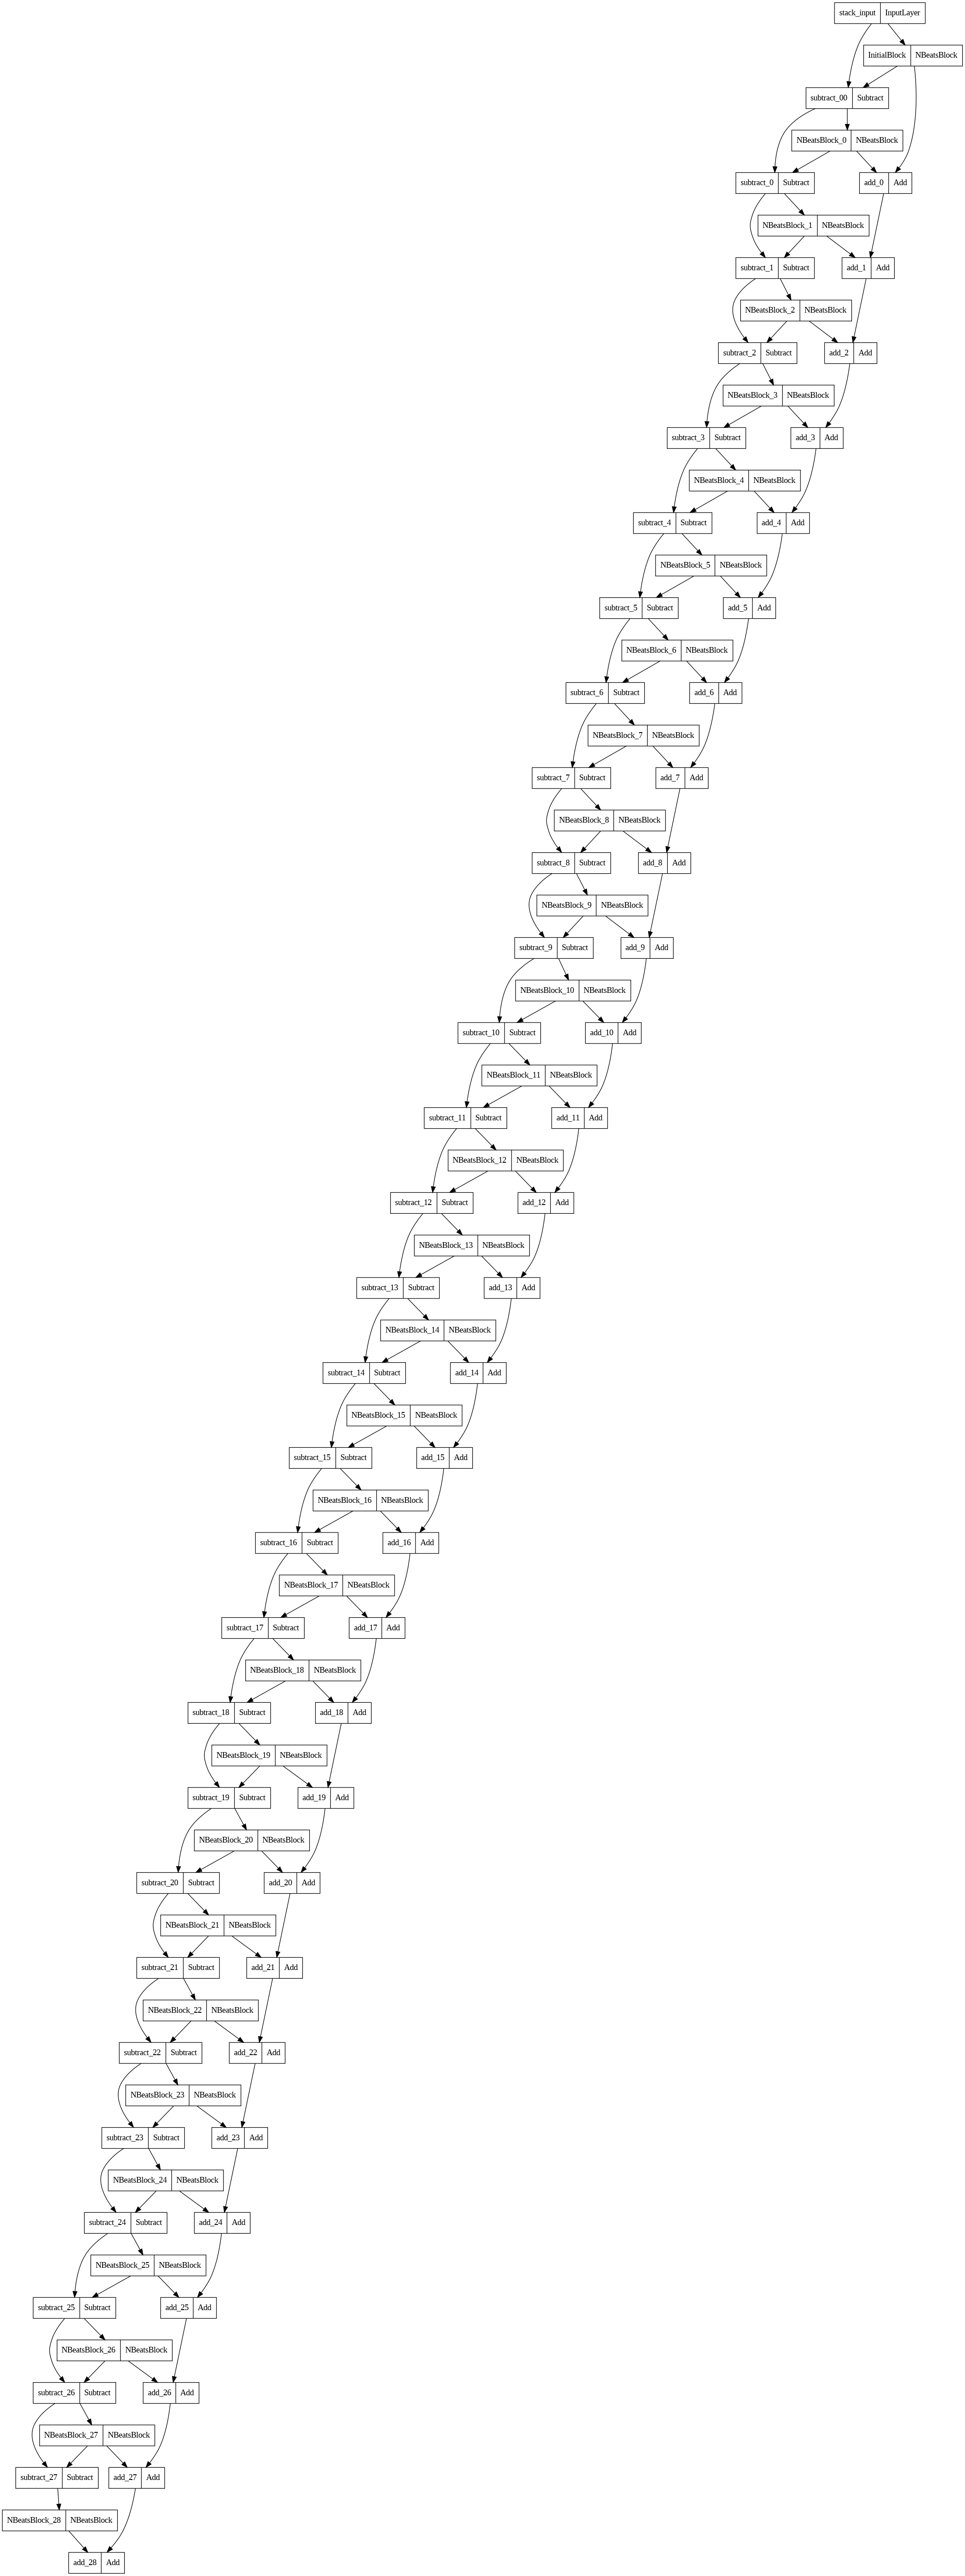

In [105]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [106]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

Model 8

In [107]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [108]:

%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 537: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 637: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 292: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 392: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 146: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 502: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 609: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 709: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 397: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 497:

In [109]:

# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [110]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8801.835,  8806.474,  9067.665, ..., 50582.7  , 48280.914,
        46179.566],
       [ 8785.099,  8794.211,  9081.967, ..., 49468.56 , 48386.83 ,
        45906.14 ],
       [ 8809.798,  8786.588,  9017.509, ..., 50241.8  , 47798.93 ,
        46604.895],
       ...,
       [ 8811.358,  8773.499,  9058.985, ..., 49825.04 , 49022.652,
        45875.27 ],
       [ 8743.161,  8809.175,  9056.254, ..., 49923.37 , 47757.316,
        45613.926],
       [ 8794.426,  8773.243,  9064.35 , ..., 50134.582, 47997.434,
        46041.29 ]], dtype=float32)>

In [111]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 565.93567,
 'mse': 1132416.8,
 'rmse': 1064.1506,
 'mape': 2.576205,
 'mase': 0.99419224}

In [112]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

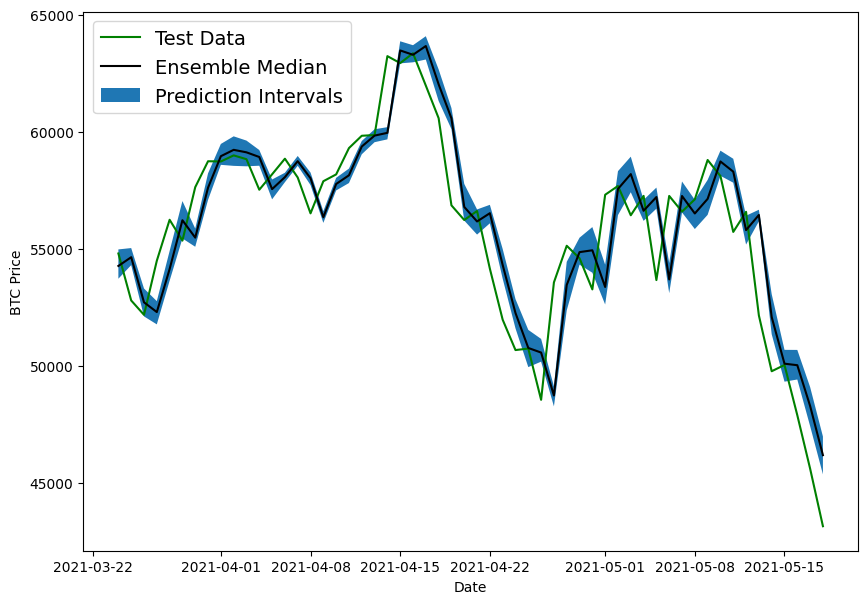

In [113]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Model 9

In [114]:

bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [115]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [116]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [117]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [118]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [119]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [120]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 59ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54856.62890625

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54856.62890625] -> Prediction: 51199.80859375

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54856.62890625 51199.80859375] -> Prediction: 49401.08203125

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54856.62890625 51199.80859375 49401.08203125] -> Prediction: 48086.63671875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 54856.62890625
 51199.80859375 49401.08203125 48086.6

In [121]:
future_forecast[:10]

[54856.63,
 51199.81,
 49401.082,
 48086.637,
 45945.188,
 45811.734,
 48797.145,
 53308.117,
 50082.84,
 48036.727]

In [122]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


In [123]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [124]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [125]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54856.63 , 51199.81 , 49401.082, 48086.637, 45945.188,
        45811.734, 48797.145, 53308.117, 50082.84 , 48036.727, 46558.27 ,
        46095.367, 48119.273, 51000.016], dtype=float32))

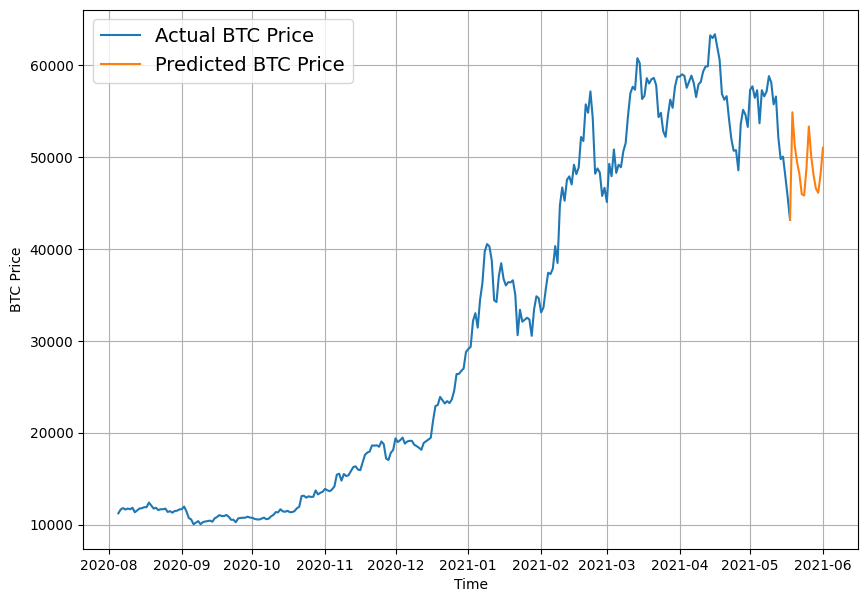

In [126]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Model 10

In [127]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [128]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [129]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

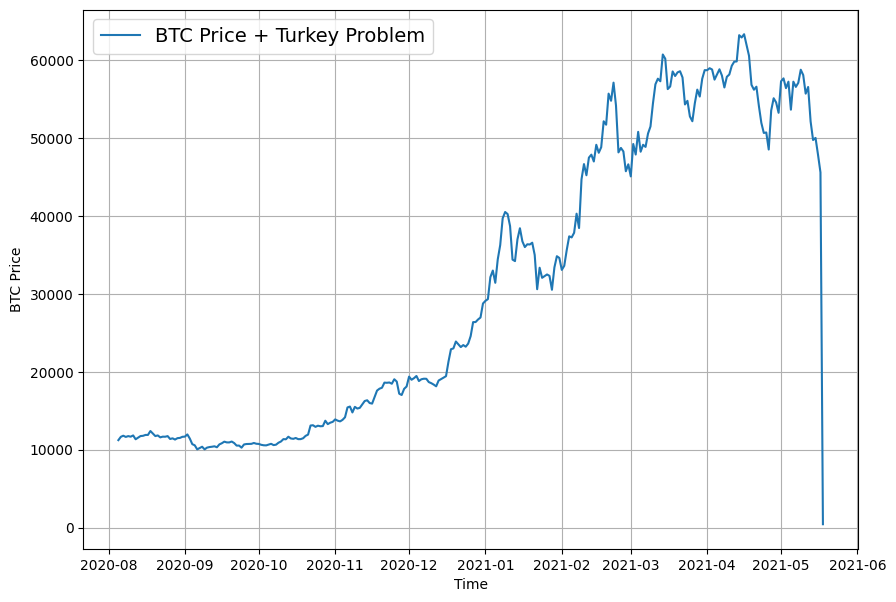

In [130]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [131]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [132]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [133]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 742.7501


742.7500610351562

In [134]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 646.1962


646.1962280273438

In [135]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8814.516, 8749.962, 9023.544, 8733.814, 8720.703, 8728.861,
       8658.151, 8480.697, 8446.381, 8507.984], dtype=float32)>

In [136]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17123.984,
 'mse': 614034200.0,
 'rmse': 23703.264,
 'mape': 121.27442,
 'mase': 26.49942}

In [137]:
model_1_results

{'mae': 563.5636,
 'mse': 1149955.4,
 'rmse': 1072.3597,
 'mape': 2.5298905,
 'mase': 0.99002516}

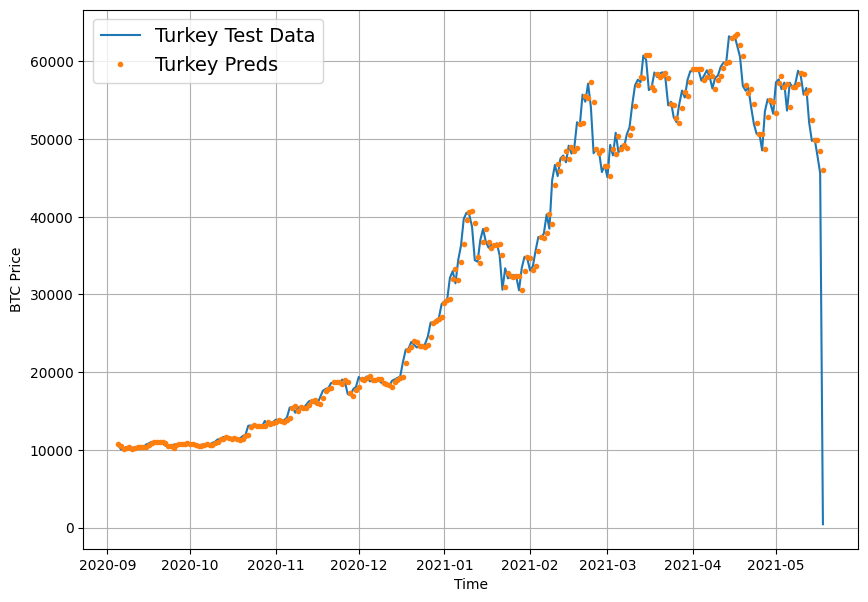

In [138]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [139]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,563.563599,1.149955e+06,1072.359741,2.529891,0.990025
model_2_dense_w30_h1,606.135681,1.251387e+06,1118.654053,2.728874,1.059531
model_3_dense_w30_h7,1247.098511,5.430632e+06,1428.600220,5.555855,2.219142
model_4_CONV1D,575.755493,1.195582e+06,1093.427002,2.574986,1.011443
model_5_LSTM,593.429199,1.262200e+06,1123.476685,2.671903,1.042491
model_6_multivariate,566.822937,1.162655e+06,1078.264893,2.552820,0.995751
model_8_NBEATs,580.767395,1.156156e+06,1075.246948,2.665417,1.020247
model_9_ensemble,565.935669,1.132417e+06,1064.150635,2.576205,0.994192
model_10_turkey,17123.984375,6.140342e+08,23703.263672,121.274422,26.499420


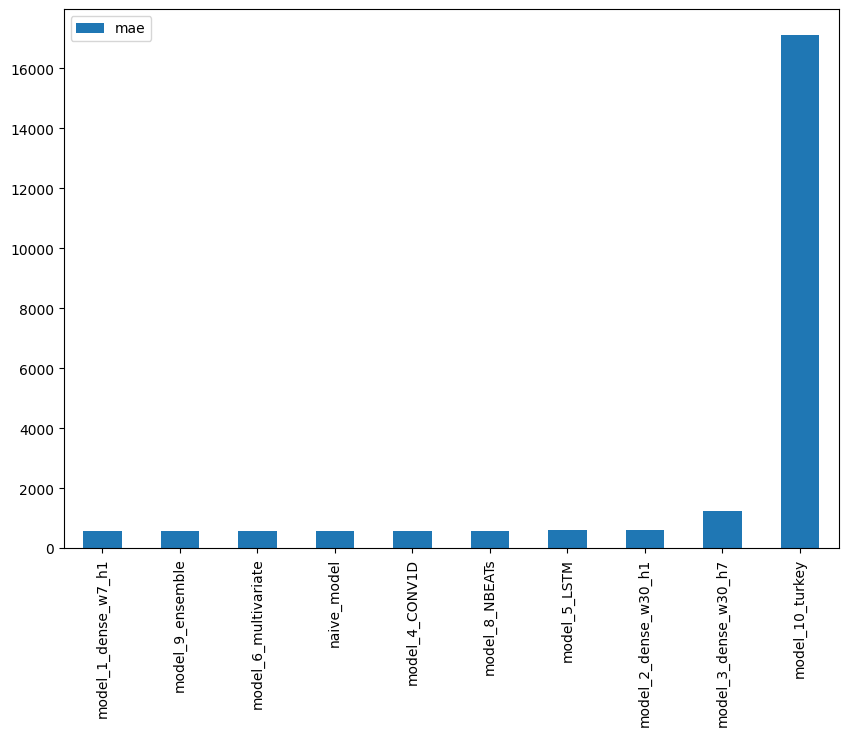

In [140]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");